## Project : Classification

In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns               
import matplotlib.pyplot as plt 
import seaborn as sn                
%matplotlib inline

In [2]:
# loading the data
train = pd.read_csv('/Users/HP/Desktop/PROJECT/pred/train.csv')
test = pd.read_csv('/Users/HP/Desktop/PROJECT/pred/test.csv')

Let's check the features present in our data and then we will look at their data types.

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [5]:
train.shape, test.shape

((31647, 18), (13564, 17))

Next, let's look at how many categorical and numerical variables are there in our dataset.

In [6]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [8]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train['subscribed'].value_counts()/len(train['subscribed'])

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

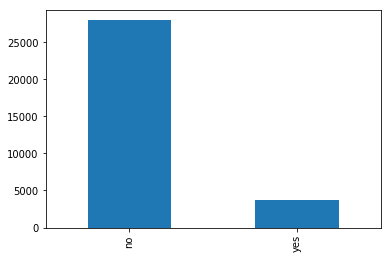

In [10]:
train['subscribed'].value_counts().plot.bar()


Let's  look  at the distribution of age variable to see how many people belongs to a particular age group.

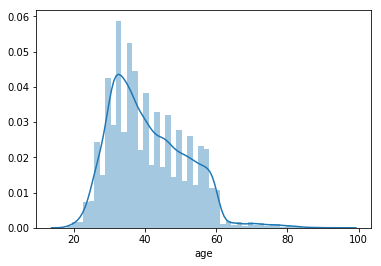

In [11]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

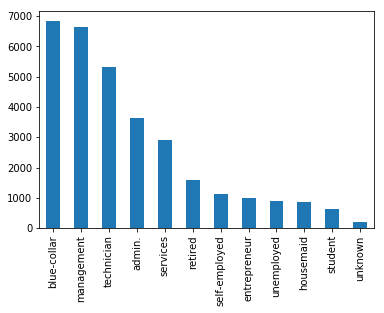

In [12]:
train['job'].value_counts().plot.bar()


Let's also look at how many clients have default history.

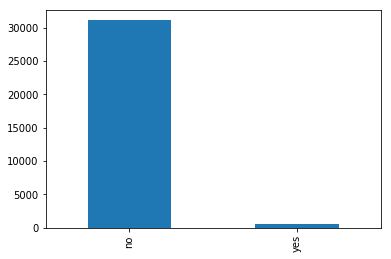

In [13]:
train['default'].value_counts().plot.bar()

## Bivariate Analysis

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

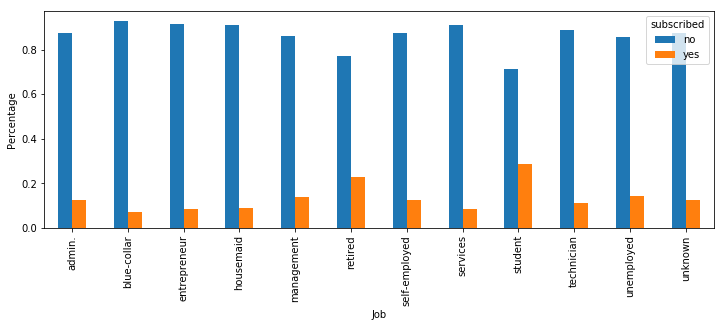

In [15]:
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1),axis=0).plot(kind="bar",figsize=(12,4))
plt.xlabel('Job')
plt.ylabel('Percentage')

# Model Building

In [16]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [17]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [18]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [19]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [20]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [21]:
train.shape

(31647, 52)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=101)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lreg = LogisticRegression()

In [26]:
lreg.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# making prediction on the validation set
prediction = lreg.predict(X_val)
print(prediction)

[0 0 0 ... 1 0 0]


Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.9041074249605056

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [34]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9142180094786729

# Now we will make prediction  for Test data

In [35]:
test = pd.get_dummies(test)

In [36]:
test.shape

(13564, 52)

In [37]:
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file.

In [39]:
submission = pd.DataFrame()

In [40]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [41]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [42]:

submission.to_csv('submission.csv')